## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [326]:
# Import tools and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics import regressionplots
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.metrics import r2_score

# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [327]:
# Import main dataframe
df = pd.read_csv('data/kc_house_data.csv')

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [329]:
# Clean data by dropping columns deemed unncessary

df_clean = df.drop(['id', 'date', 'view', 'condition', 'heat_source', 'sewer_system',  'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long'], axis=1)

id - singular identifier, not related to price
date - 
view - mostly NONE values so deemed not useful
condition - too similar to grade while being less detailed
heat_source
sewer_system
sqft_above
sqft_basement
yr_renovated
address
lat
long

In [330]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,sqft_garage,sqft_patio,yr_built
0,675000.00000,4,1.00000,1180,7140,1.00000,NO,NO,NO,7 Average,0,40,1969
1,920000.00000,5,2.50000,2770,6703,1.00000,NO,NO,YES,7 Average,0,240,1950
2,311000.00000,6,2.00000,2880,6156,1.00000,NO,NO,NO,7 Average,0,0,1956
3,775000.00000,3,3.00000,2160,1400,2.00000,NO,NO,NO,9 Better,200,270,2010
4,592500.00000,2,2.00000,1120,758,2.00000,NO,NO,YES,7 Average,550,30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00000,5,2.00000,1910,4000,1.50000,NO,NO,NO,8 Good,0,210,1921
30151,1313000.00000,3,2.00000,2020,5800,2.00000,NO,NO,NO,7 Average,0,520,2011
30152,800000.00000,3,2.00000,1620,3600,1.00000,NO,NO,YES,7 Average,240,110,1995
30153,775000.00000,3,2.50000,2570,2889,2.00000,NO,NO,NO,8 Good,480,100,2006


In [331]:
# Convert string values to integers

df_clean['waterfront'].replace(['NO','YES'], [0,1], inplace = True)
df_clean['greenbelt'].replace(['NO','YES'], [0,1], inplace = True)
df_clean['nuisance'].replace(['NO','YES'], [0,1], inplace = True)

In [332]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30155 non-null  float64
 1   bedrooms     30155 non-null  int64  
 2   bathrooms    30155 non-null  float64
 3   sqft_living  30155 non-null  int64  
 4   sqft_lot     30155 non-null  int64  
 5   floors       30155 non-null  float64
 6   waterfront   30155 non-null  int64  
 7   greenbelt    30155 non-null  int64  
 8   nuisance     30155 non-null  int64  
 9   grade        30155 non-null  object 
 10  sqft_garage  30155 non-null  int64  
 11  sqft_patio   30155 non-null  int64  
 12  yr_built     30155 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 3.0+ MB


In [333]:
# Check non-numeric values

df_clean['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [334]:
# Extract numeric values from 'Grade' column and convert to integers

df_clean['grade'] = df_clean['grade'].str[:2].astype(np.int64)

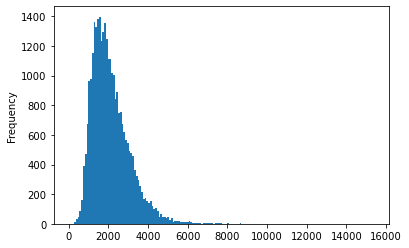

In [335]:
binvar = np.sqrt(df.sqft_living.count())
df_clean['sqft_living'].plot(kind = 'hist', bins = int(binvar));

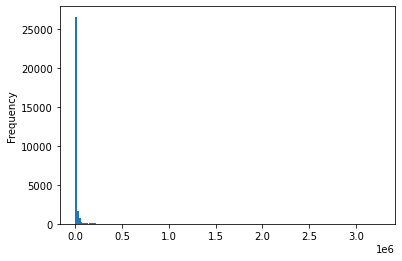

In [336]:
df_clean['sqft_lot'].plot(kind = 'hist', bins = int(binvar));

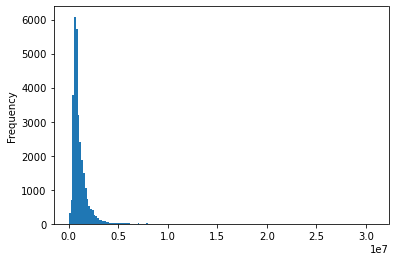

In [337]:
df_clean['price'].plot(kind = 'hist', bins = int(binvar));

In [338]:
# Removing top 1% of price to reduce outliers

df_clean = df_clean[df_clean['sqft_living'] < df_clean['sqft_living'].quantile(0.99)]
df_clean = df_clean[df_clean['sqft_lot'] < df_clean['sqft_lot'].quantile(0.99)]
df_clean = df_clean[df_clean['price'] < df_clean['price'].quantile(0.90)]

In [339]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26582 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        26582 non-null  float64
 1   bedrooms     26582 non-null  int64  
 2   bathrooms    26582 non-null  float64
 3   sqft_living  26582 non-null  int64  
 4   sqft_lot     26582 non-null  int64  
 5   floors       26582 non-null  float64
 6   waterfront   26582 non-null  int64  
 7   greenbelt    26582 non-null  int64  
 8   nuisance     26582 non-null  int64  
 9   grade        26582 non-null  int64  
 10  sqft_garage  26582 non-null  int64  
 11  sqft_patio   26582 non-null  int64  
 12  yr_built     26582 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.8 MB


In [340]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,sqft_garage,sqft_patio,yr_built
0,675000.00000,4,1.00000,1180,7140,1.00000,0,0,0,7,0,40,1969
1,920000.00000,5,2.50000,2770,6703,1.00000,0,0,1,7,0,240,1950
2,311000.00000,6,2.00000,2880,6156,1.00000,0,0,0,7,0,0,1956
3,775000.00000,3,3.00000,2160,1400,2.00000,0,0,0,9,200,270,2010
4,592500.00000,2,2.00000,1120,758,2.00000,0,0,1,7,550,30,2012


## END OF DATA CLEANING

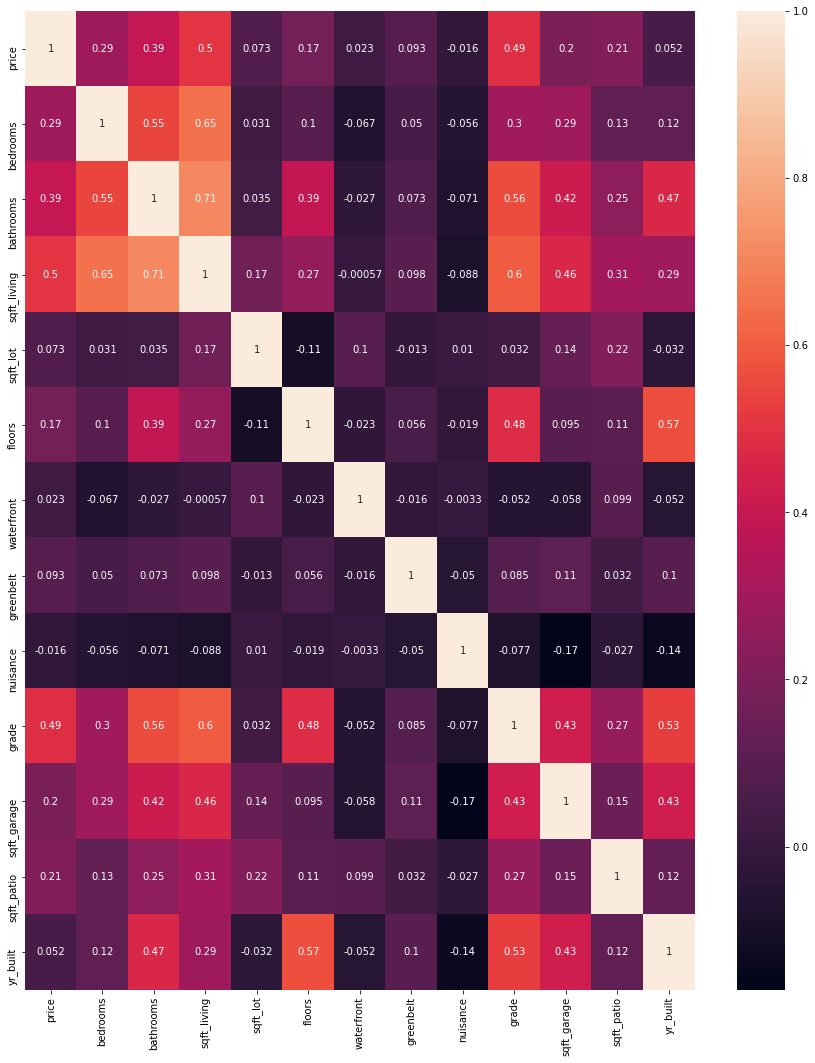

In [341]:
# Correlation heatmap for intial cleansed dataset

fig, ax = plt.subplots(figsize=(15, 18))

sns.heatmap(df_clean.corr(), annot=True);

In [342]:
#sns.pairplot(df_clean)
#plt.show()

In [343]:
train = df_clean.copy()
test = df_clean.copy()

X_train = train.drop("price", axis=1)
y_train = train["price"]

X_test = test.drop("price", axis=1)
y_test = test["price"]

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,sqft_garage,sqft_patio,yr_built
0,4,1.00000,1180,7140,1.00000,0,0,0,7,0,40,1969
1,5,2.50000,2770,6703,1.00000,0,0,1,7,0,240,1950
2,6,2.00000,2880,6156,1.00000,0,0,0,7,0,0,1956
3,3,3.00000,2160,1400,2.00000,0,0,0,9,200,270,2010
4,2,2.00000,1120,758,2.00000,0,0,1,7,550,30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
30150,5,2.00000,1910,4000,1.50000,0,0,0,8,0,210,1921
30151,3,2.00000,2020,5800,2.00000,0,0,0,7,0,520,2011
30152,3,2.00000,1620,3600,1.00000,0,0,1,7,240,110,1995
30153,3,2.50000,2570,2889,2.00000,0,0,0,8,480,100,2006


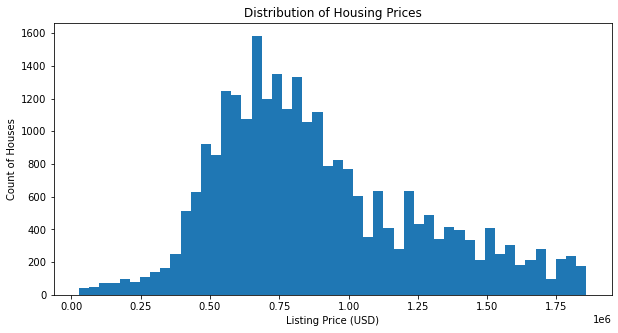

In [344]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=50)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Housing Prices");

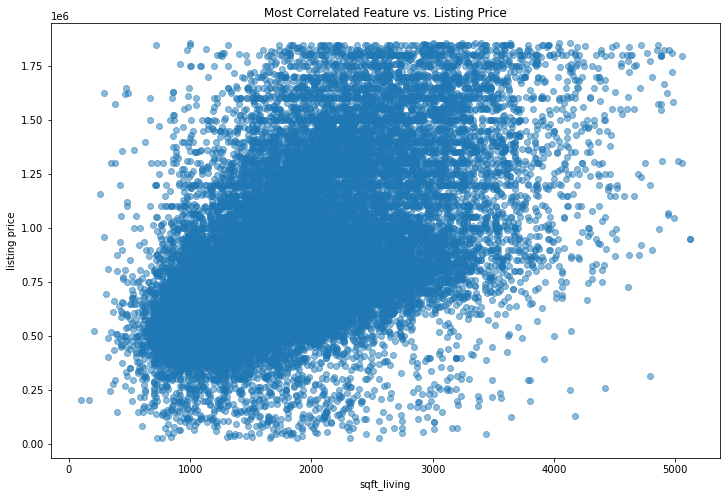

In [345]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X_train['sqft_living'], y_train, alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [346]:
X = df_clean

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='price'),X.price, test_size = .25, random_state = 420)

training_data = pd.concat([X_train,y_train], axis = 1)
testing_data = pd.concat([X_test,y_test], axis = 1)

dummy_regr = DummyRegressor(strategy = 'mean')
dummy_regr.fit(X_train,y_train)
dummy_regr.predict(X_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_train, y_train)
dummy_regr.score(X_test, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train),squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')


Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 368359.0

Baseline Model Test Score: -8.697059778306482e-05
Baseline Model Test RMSE: 363491.0


In [348]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

In [349]:
X = df_clean.drop(columns='price')
y = df_clean['price']

In [350]:
baseline_model = LinearRegression()

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
  
lm_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)
y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
y_predict_dummy_median = lm_dummy_median.predict(X_test)

In [352]:
print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(y_test, 
                                                                    y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_predict)))
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(r2_score(y_test, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [-1.64972204e+04  6.07587776e+04  1.39321834e+02  5.72801601e-02
  2.57511885e+04  9.90436041e+04  1.58461881e+05  2.91958191e+03
  1.56406221e+05 -3.23350328e+01  4.34446542e+01 -3.66309440e+03]
Mean squared error (dummy): 132714672188.77
Mean squared error (linear model): 84214007211.31
Median absolute error (dummy): 215227.00
Median absolute error (linear model): 175154.18
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.05
r2_score (linear model): 0.37


In [353]:
baseline_model = LinearRegression()

In [354]:
X_train = df_clean.drop(columns='price')
y_train = df_clean['price']

most_correlated_feature = 'sqft_living'

In [355]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1000)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.25418016659050335
Validation score: 0.25366671421563824


In [356]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
greenbelt: True
nuisance: False
grade: True
sqft_garage: True
sqft_patio: True
yr_built: True


In [280]:
import numpy as np
from sklearn.dummy import DummyRegressor

In [361]:
df_clean['avg_price'] = df_clean['price'].mean()
X = df_clean['avg_price']
y = df_clean['price']
dummy_model = sm.OLS(y, sm.add_constant(X)).fit()

In [362]:
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 13 Feb 2023   Prob (F-statistic):                nan
Time:                        15:11:34   Log-Likelihood:            -3.7833e+05
No. Observations:               26582   AIC:                         7.567e+05
Df Residuals:                   26581   BIC:                         7.567e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_price      1.0000      0.003    393.218      0.000       0.995       1.005
==============================================================================
Omnibus:                     1626.202   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1932.947
Skew:                           0.657   Prob(JB):                         0.00
Kurtosis:                       2.862   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
predictions = dummy_model.predict(df_clean['price'])

In [364]:
predictions

0        675000.00000
1        920000.00000
2        311000.00000
3        775000.00000
4        592500.00000
             ...     
30150   1555000.00000
30151   1313000.00000
30152    800000.00000
30153    775000.00000
30154    500000.00000
Length: 26582, dtype: float64